Import Libraries and DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('thyroid.csv')

Exploring the Dataset 

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

The Dataset contains some missing values which are represented by '?'. So we will remove them.

In [6]:
df.replace('?', np.nan, inplace=True)

Remove unnecessary columns

In [7]:
df = df.drop(['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'], axis=1)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,1.3,2.5,125,1.14,109,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,4.1,2,102,NaN,NaN,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,0.98,NaN,109,0.91,120,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,0.16,1.9,175,NaN,NaN,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,0.72,1.2,61,0.87,70,NaN,SVI,P


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Label encoding all the CATEGORICAL columns

In [9]:
categorical = []
continous = []
for col in df.columns:
    if df[col].value_counts().shape[0]<10:
        categorical.append(col)
    else:
        continous.append(col)

In [10]:
print(categorical)
print(continous)

['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TBG', 'referral source', 'binaryClass']
['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [11]:
new_df = df.copy()

In [12]:
new_df = new_df.drop(columns=['query on thyroxine', 'query hypothyroid', 'query hyperthyroid','psych', 'on thyroxine', 'referral source','on antithyroid medication','hypopituitary'], axis=1)

In [13]:
new_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,TBG,binaryClass
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,NaN,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,NaN,P
2,46,M,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,NaN,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,NaN,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,NaN,P


In [14]:
new_df['lithium'].value_counts()

f    3754
t      18
Name: lithium, dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   object 
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   object 
 10  T3               3003 non-null   object 
 11  TT4              3541 non-null   object 
 12  T4U              3385 non-null   object 
 13  FTI              3387 non-null   object 
 14  TBG              0 non-null      float64
 15  binaryClass      3772 non-null   object 
dtypes: float64(1), object(15)
memory usage: 471.6+ KB


In [16]:
new_df = new_df.drop(columns=['TBG'])
new_df.isna().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
binaryClass          0
dtype: int64

Label Encoding the Categorical columns

In [17]:
new_df.rename({'binaryClass':'Output'},axis=1, inplace=True)

In [18]:
categorical = []
continous = []
for col in new_df.columns:
    if new_df[col].value_counts().shape[0]<3:
        categorical.append(col)
    else:
        continous.append(col)
print(categorical)

['sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre', 'tumor', 'Output']


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    new_df[col] = le.fit_transform(new_df[col])
    

In [20]:
new_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Output
0,41,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1
1,23,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1
2,46,1,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1
3,70,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1
4,70,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1


Change column datatype from 'Object' to other respective datatype 

In [21]:
for col in new_df.columns:
    new_df[col] = pd.to_numeric(new_df[col])

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3772 non-null   int32  
 2   sick             3772 non-null   int32  
 3   pregnant         3772 non-null   int32  
 4   thyroid surgery  3772 non-null   int32  
 5   I131 treatment   3772 non-null   int32  
 6   lithium          3772 non-null   int32  
 7   goitre           3772 non-null   int32  
 8   tumor            3772 non-null   int32  
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Output           3772 non-null   int32  
dtypes: float64(6), int32(9)
memory usage: 309.5 KB


In [23]:
new_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Output
0,41.0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,23.0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,1
2,46.0,1,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,1
3,70.0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,1
4,70.0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1


In [24]:
new_df.corr()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Output
age,1.000000,-0.017864,0.079468,-0.113521,-0.029502,0.053149,-0.030126,-0.051830,-0.025037,-0.059087,-0.238412,-0.038841,-0.166250,0.052788,0.003174
sex,-0.017864,1.000000,-0.002918,-0.065191,-0.037128,-0.005914,-0.019728,-0.004982,-0.071007,-0.017515,-0.046454,-0.130615,-0.201055,-0.015849,0.042877
sick,0.079468,-0.002918,1.000000,-0.024040,-0.000762,-0.025384,-0.013944,-0.019205,0.010949,-0.022987,-0.085022,-0.038327,-0.040934,-0.022200,0.001749
pregnant,-0.113521,-0.065191,-0.024040,1.000000,-0.014251,-0.015048,-0.008266,0.012447,0.123728,-0.020694,0.192518,0.174197,0.338130,-0.016869,0.034516
thyroid surgery,-0.029502,-0.037128,-0.000762,-0.014251,1.000000,0.003104,-0.008266,-0.011385,-0.004990,0.026251,-0.028495,-0.021816,0.029046,-0.033109,0.017633
I131 treatment,0.053149,-0.005914,-0.025384,-0.015048,0.003104,1.000000,-0.008729,-0.012022,-0.020371,-0.004129,0.013508,-0.008853,0.009575,-0.017120,-0.003590
lithium,-0.030126,-0.019728,-0.013944,-0.008266,-0.008266,-0.008729,1.000000,-0.006604,-0.011190,-0.006755,0.008928,-0.013916,0.015173,-0.025954,0.005603
goitre,-0.051830,-0.004982,-0.019205,0.012447,-0.011385,-0.012022,-0.006604,1.000000,0.002399,-0.013514,0.014646,-0.019833,0.036737,-0.041753,0.027575
tumor,-0.025037,-0.071007,0.010949,0.123728,-0.004990,-0.020371,-0.011190,0.002399,1.000000,-0.015232,0.112429,0.062998,0.097536,0.013092,-0.003747
TSH,-0.059087,-0.017515,-0.022987,-0.020694,0.026251,-0.004129,-0.006755,-0.013514,-0.015232,1.000000,-0.161823,-0.267365,0.073391,-0.304684,-0.425893


In [25]:
new_df.describe()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Output
count,3771.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000
mean,51.735879,0.382291,0.038971,0.014051,0.014051,0.015642,0.004772,0.009014,0.025451,5.086766,2.013500,108.319345,0.995000,110.469649,0.922853
std,20.084958,0.561927,0.193552,0.117716,0.117716,0.124101,0.068924,0.094525,0.157510,24.521470,0.827434,35.604248,0.195457,33.089698,0.266861
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.600000,88.000000,0.880000,93.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,2.000000,103.000000,0.980000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,2.400000,124.000000,1.080000,124.000000,1.000000
max,455.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000


In [26]:
new_df.isna().sum()

age                  1
sex                  0
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Output               0
dtype: int64

In [27]:
continuous = []
for col in new_df.columns:
    if new_df[col].value_counts().shape[0]>=3:
        continuous.append(col)
for col in continuous:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3772 non-null   float64
 1   sex              3772 non-null   int32  
 2   sick             3772 non-null   int32  
 3   pregnant         3772 non-null   int32  
 4   thyroid surgery  3772 non-null   int32  
 5   I131 treatment   3772 non-null   int32  
 6   lithium          3772 non-null   int32  
 7   goitre           3772 non-null   int32  
 8   tumor            3772 non-null   int32  
 9   TSH              3772 non-null   float64
 10  T3               3772 non-null   float64
 11  TT4              3772 non-null   float64
 12  T4U              3772 non-null   float64
 13  FTI              3772 non-null   float64
 14  Output           3772 non-null   int32  
dtypes: float64(6), int32(9)
memory usage: 309.5 KB


In [29]:
new_df.isna().sum()


age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Output             0
dtype: int64

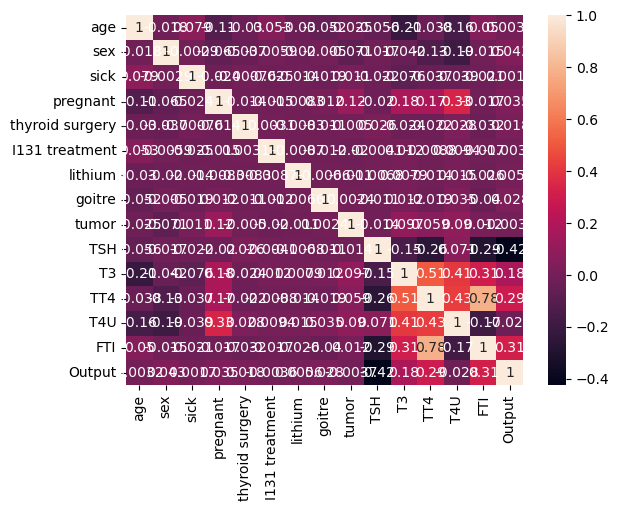

In [30]:
# Heatmap
sns.heatmap(new_df.corr(), annot = True)
plt.show()

Split data into train and test data

In [31]:
x = new_df.drop('Output', axis=1)
y = new_df['Output']

In [32]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)


In [33]:
import pickle
pickle.dump(std, open('scaling.pkl','wb'))

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=new_df['Output'])

In [46]:
new_df.head(-5)

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Output
0,41.0,0,0,0,0,0,0,0,0,1.300000,2.5000,125.000000,1.140,109.000000,1
1,23.0,0,0,0,0,0,0,0,0,4.100000,2.0000,102.000000,0.995,110.469649,1
2,46.0,1,0,0,0,0,0,0,0,0.980000,2.0135,109.000000,0.910,120.000000,1
3,70.0,0,0,0,0,0,0,0,0,0.160000,1.9000,175.000000,0.995,110.469649,1
4,70.0,0,0,0,0,0,0,0,0,0.720000,1.2000,61.000000,0.870,70.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762,61.0,1,0,0,0,0,0,0,0,5.086766,1.0000,72.000000,0.700,103.000000,1
3763,41.0,0,0,0,0,0,0,0,0,5.086766,2.0135,108.319345,0.995,110.469649,1
3764,54.0,1,0,0,0,0,0,0,0,1.200000,1.9000,89.000000,0.850,104.000000,1
3765,73.0,0,0,0,0,0,0,0,0,8.500000,2.1000,104.000000,1.130,92.000000,1


In [36]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=10)
svm_model.fit(x_train,y_train)
svm_predict = svm_model.predict(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=20, max_iter=1000)
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)

In [38]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

c:\Users\arvind\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(x_train, y_train)
dectree_predict = dectree.predict(x_test)

Calculate accuracy of the models


In [40]:
from sklearn.metrics import accuracy_score
svm_res = accuracy_score(y_test, svm_predict)

logreg_res = accuracy_score(y_test, logreg_predict)

knn_res = accuracy_score(y_test, knn_predict)

dectree_res = accuracy_score(y_test, dectree_predict)



In [41]:

print('SVM model accuracy is: {}'.format(svm_res*100))
print('Logistic Regression model accuracy is: {}'.format(logreg_res*100))
print('K Nearest Neighbours model accuracy is: {}'.format(knn_res*100))
print('Decision Tree model accuracy is: {}'.format(dectree_res*100))

SVM model accuracy is: 95.40636042402826
Logistic Regression model accuracy is: 95.14134275618375
K Nearest Neighbours model accuracy is: 94.78798586572438
Decision Tree model accuracy is: 97.6148409893993


In [42]:
from sklearn.metrics import f1_score
print(f1_score(y_test, svm_predict))
print(f1_score(y_test, logreg_predict))

print(f1_score(y_test, knn_predict))

print(f1_score(y_test, dectree_predict))


0.9756097560975608
0.9742388758782202
0.9724941724941726
0.9871244635193133


Confusion Matrix for the Models


In [43]:
from sklearn.metrics import confusion_matrix

#for svm model
print('svm model confusion matrix')
print(confusion_matrix(y_test, svm_predict))

print('\n')

print('logistic regression model confusion matrix')
print(confusion_matrix(y_test, logreg_predict))
print('\n')

print('KNN model confusion matrix')
print(confusion_matrix(y_test, knn_predict))
print('\n')

print('Decision Tree model confusion matrix')
print(confusion_matrix(y_test, dectree_predict))
print('\n')


svm model confusion matrix
[[  40   47]
 [   5 1040]]


logistic regression model confusion matrix
[[  37   50]
 [   5 1040]]


KNN model confusion matrix
[[  30   57]
 [   2 1043]]


Decision Tree model confusion matrix
[[  70   17]
 [  10 1035]]




Saving The Best Model

In [44]:
import pickle
pickle.dump(dectree, open('saved_dectree.pkl','wb'))

In [45]:
print(x[0])

[-0.53466511 -0.68041126 -0.20137459 -0.11937815 -0.11937815 -0.126056
 -0.06924511 -0.09537176 -0.16160242 -0.16260753  0.6590677   0.48361026
  0.78322711 -0.04687735]
